# Model 1

## Correlation

In [64]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df = pd.read_excel(file_path)

df = df.fillna(0)
df=df.drop(['Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks',
            'MobileWeb_TWC Mobile Web_Visits', 'Web_TWC Web_Visits',
            'Apps_TWC Universal iOS 4G+_Visits','Apps_TWC Universal Android 4G+_Visits',
           'Installs_Critical_Event_Flag',
            'Overall_Product_Visits',
            'Total_App_Installs',
            'Overall_Visits_Critical_Event_Flag','Critical_Event_Flag'
           #'Visits_Critical_Event_Flag', 'Overall_Web_Visits'
           ], axis =1)
# Compute the correlation matrix
correlation_matrix = df.corr()


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_22340\1832113608.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [66]:
correlation_matrix.to_clipboard()

## VIF

In [70]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df_, var):
    df_ = df_[var]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_.columns
    vif_data["VIF"] = [variance_inflation_factor(df_.values, i) for i in range(len(df_.columns))]
    return vif_data

# Load your DataFrame (update the file path)
file_path = 'C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx'  # Update with the actual path to your file
df_ = pd.read_excel(file_path)
df_=df_.fillna(0)

# Define the features
date_var = ['Date']
temp_var = ['PaidSocial_Twitter_Spend', 'PaidSocial_Twitter_Clicks', 'PaidSocial_Twitter_Impressions',
            'Programmatic_TikTok_Spend', 'Programmatic_TikTok_Clicks', 'Programmatic_TikTok_Impressions',
            'Overall_Product_Visits', 
            #'EventsCamp/Vend_Campaign_Flag', 
            #'Visits_Critical_Event_Flag',
            'Overall_Visits_Critical_Event_Flag', 'Installs_Critical_Event_Flag', 
            'MobileWeb_TWC Mobile Web_Visits', 'Critical_Event_Flag',
            'Apps_TWC Universal Android 4G+_Visits', 'Apps_TWC Universal iOS 4G+_Visits','Web_TWC Web_Visits',
            'Overall_Web_Visits','Total_App_Installs','Overall_Product_Visits',
            'EventsCamp/Vend_Campaign/Vendor(s)', 'Event_Name','Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks','PaidSocial_Vibe_Spend',
'PaidSocial_Vibe_Impressions']

cols = list(df_.columns)
remove_var = date_var + temp_var
cols = [item for item in cols if item not in remove_var]

# Calculate VIF
df_ads_vif = get_vif(df_, cols)
print(df_ads_vif)


                            Variable           VIF
0                   SEM_Google_Spend  1.142867e+01
1                  SEM_Google_Clicks  1.387592e+01
2             SEM_Google_Impressions  2.088685e+00
3      Preload_IronSource_Aura_Spend  2.888608e+01
4   Preload_IronSource_Aura_launches  2.501310e+01
..                               ...           ...
62                               NPS  2.420708e+02
63      Positive impact on community  3.139859e+05
64     Positive impact on well being  1.267484e+06
65                       Brand_Spend  5.553629e+00
66                 Brand_Impressions  8.545274e+00

[67 rows x 2 columns]


In [71]:
df_ads_vif

,Variable,VIF
0,SEM_Google_Spend,1.142867e+01
1,SEM_Google_Clicks,1.387592e+01
2,SEM_Google_Impressions,2.088685e+00
3,Preload_IronSource_Aura_Spend,2.888608e+01
4,Preload_IronSource_Aura_launches,2.501310e+01
...,...,...
62,NPS,2.420708e+02
63,Positive impact on community,3.139859e+05
64,Positive impact on well being,1.267484e+06
65,Brand_Spend,5.553629e+00


In [72]:
df_ads_vif.to_clipboard()


## High Corr Pairs

In [67]:
# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df = pd.read_excel(file_path)

df = df.fillna(0)
df_corr = []

df = df.drop(['Date','PaidSocial_Twitter_Spend', 'PaidSocial_Twitter_Clicks', 'PaidSocial_Twitter_Impressions',
            'Programmatic_TikTok_Spend', 'Programmatic_TikTok_Clicks', 'Programmatic_TikTok_Impressions',
            'Overall_Product_Visits', 
              #'EventsCamp/Vend_Campaign_Flag', 
              'Critical_Event_Flag',
            'Overall_Visits_Critical_Event_Flag', 'Installs_Critical_Event_Flag', 'MobileWeb_TWC Mobile Web_Visits',
            'Apps_TWC Universal Android 4G+_Visits', 'Apps_TWC Universal iOS 4G+_Visits','Web_TWC Web_Visits',
            #'Overall_Web_Visits',
              'Total_App_Installs','Overall_Product_Visits',
            'EventsCamp/Vend_Campaign/Vendor(s)', 'Event_Name','Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks'], axis =1)


#df_corr = pd.DataFrame()
for var1 in list(df.columns):
    for var2 in list(df.columns):
        corr = df[var1].corr(df[var2])
        #if (abs(corr) >= 0.75 and abs(corr) < 1) and (var1 != var2):
         #   print (corr)
        df_corr.append({"variable 1": var1, "variable 2": var2, "Correlation": corr})
df_corr1 = pd.DataFrame(df_corr)           

In [68]:
df_corr1

,variable 1,variable 2,Correlation
0,SEM_Google_Spend,SEM_Google_Spend,1.000000
1,SEM_Google_Spend,SEM_Google_Clicks,0.854827
2,SEM_Google_Spend,SEM_Google_Impressions,0.508332
3,SEM_Google_Spend,Preload_IronSource_Aura_Spend,0.384936
4,SEM_Google_Spend,Preload_IronSource_Aura_launches,0.326721
...,...,...,...
4895,Brand_Impressions,NPS,-0.176480
4896,Brand_Impressions,Positive impact on community,0.033404
4897,Brand_Impressions,Positive impact on well being,0.033934
4898,Brand_Impressions,Brand_Spend,0.743216


In [53]:
df_corr1.columns

Index(['variable 1', 'variable 2', 'Correlation'], dtype='object')

In [69]:
# Create a set to keep track of unique pairs
unique_pairs = set()
rows_to_keep = []

for index, row in df_corr1.iterrows():
    pair = tuple(sorted([row['variable 1'], row['variable 2']]))
    if pair not in unique_pairs:
        unique_pairs.add(pair)
        rows_to_keep.append(index)

# Filter the DataFrame to keep only unique pairs
unique_df = df_corr1.loc[rows_to_keep]

# Print the refined DataFrame
unique_df

,variable 1,variable 2,Correlation
0,SEM_Google_Spend,SEM_Google_Spend,1.000000
1,SEM_Google_Spend,SEM_Google_Clicks,0.854827
2,SEM_Google_Spend,SEM_Google_Impressions,0.508332
3,SEM_Google_Spend,Preload_IronSource_Aura_Spend,0.384936
4,SEM_Google_Spend,Preload_IronSource_Aura_launches,0.326721
...,...,...,...
4758,Positive impact on well being,Brand_Spend,-0.108974
4759,Positive impact on well being,Brand_Impressions,0.033934
4828,Brand_Spend,Brand_Spend,1.000000
4829,Brand_Spend,Brand_Impressions,0.743216


In [71]:
unique_df.to_clipboard()

## RFE

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df1 = pd.read_excel(file_path)
df1=df1.fillna(0)

In [10]:
df3=df1.drop(['SEM_Google_Clicks',
'Preload_IronSource_Aura_launches',
'Preload_IronSource_Aura_app_downloads',
'Programmatic_Bidease_Impressions',
'Preload_Digital_Turbine_app_downloads',
'Preload_Digital_Turbine_impressions',
'SEM_Apple_Search_Ads_Clicks',
'Programmatic_LiftOff_Clicks',
'Programmatic_IronSource_Sonic_Clicks',
'PaidSocial_Twitter_Spend',
'Programmatic_Tapjoy_Impressions',
'PaidSocial_Twitter_Clicks',
'PaidSocial_Twitter_Impressions',
'Programmatic_TikTok_Spend',
'Programmatic_TikTok_Clicks',
'Programmatic_TikTok_Impressions',
'PaidSocial_Vibe_Spend',
'PaidSocial_Vibe_Impressions',
'Programmatic_Persona.ly_Impressions',
'SocialEng_Facebook_Impressions',
'SocialEng_Facebook_Total_Engagements',
'SocialEng_LinkedIn_Total_Engagements',
'SocialEng_LinkedIn_Estimated_Clicks',
'SocialEng_YouTube_Total_Engagements',
'SocialEng_YouTube_Impressions',
'SocialEng_Instagram_Total_Engagements',
'SocialEng_Instagram_Impressions',
'SocialEng_Twitter_Impressions',
'SocialEng_Twitter_Estimated_Clicks',
'SocialEng_TikTok_Total_Engagements',
'OrganicSearch_Google_Impressions',
'Twitter_TikTok_Combined_Clicks',
'Usage',
'Seen as experts',
'Net Favorability',
'Realibality',
'Accuracy',
'Positive impact on well being',
'PaidSocial_Vibe_Clicks',
'Total_App_Installs',
'MobileWeb_TWC Mobile Web_Visits',
'Apps_TWC Universal Android 4G+_Visits',
'Apps_TWC Universal iOS 4G+_Visits', 
'Web_TWC Web_Visits',
#'SocialEng_YouTube_Total_Engagements',
'Overall_Product_Visits',
'Programmatic_Tapjoy_Spend',
'Influencer_Spend',
'Brand_Spend',
'Programmatic_IronSource_Sonic_Spend',
'SEM_Apple_Search_Ads_Spend',
'Programmatic_Bidease_Spend',
'Programmatic_Persona.ly_Spend',
'Preload_Digital_Turbine_Spend',
'Twitter_TikTok_Combined_Spend',
'SEM_Google_Spend',
'Programmatic_LiftOff_Spend',
'Preload_IronSource_Aura_Spend',
'Installs_Critical_Event_Flag',
#'Web_Visits_Critical_Event_Flag',
              'Overall_Visits_Critical_Event_Flag',
              'Critical_Event_Flag',
              'Event_Name',
              'EventsCamp/Vend_Campaign/Vendor(s)',
             'Positive impact on community',#'Programmatic_Bidease_Clicks',
              'Net Trust',
              'OrganicSearch_Google_Position'
], axis=1)

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import datetime

def get_feature_importance(df, target_var): 
    """Getting feature importance of the variables in the dataset, for users to make decision while choosing the contextual variables
        Args:
            df: A Pandas DataFrame
            target_var: Target variable for prediction
        Returns: DataFrame containing feature importance
    """   
    var_list = []
    for col in df.columns:
        if (col == target_var) or isinstance(df[col], datetime.date) or pd.api.types.is_datetime64_dtype(df[col]):
            continue
        if (df[col].dtypes == object) or (df[col].dtypes == str):
            continue
        var_list.append(col)

    # Ensure 'EventsCamp/Vend_Campaign_Flag' and 'Critical_Event_Flag' are included
    important_columns = ['EventsCamp/Vend_Campaign_Flag', 'Critical_Event_Flag']
    for col in important_columns:
        if col in df.columns and col not in var_list:
            var_list.append(col)
    
    print("Variables considered for feature importance:", var_list)
    
    X = df[var_list]
    y = df[target_var]
    
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    
    feat_importances = round(pd.Series(rf.feature_importances_, index=X.columns)*100, 2)
    feat_importances = feat_importances.sort_values(ascending=False)
    feat_importances_df = pd.DataFrame(feat_importances).reset_index(drop=False)
    feat_importances_df = feat_importances_df.rename({'index':'Variable', 0:'Importance'}, axis=1)

    return feat_importances_df

# Example usage:
# df = pd.read_csv('your_data.csv')
# target_var = 'your_target_variable'
# importance_df = get_feature_importance(df, target_var)
# print(importance_df)


In [12]:
# w/o removing variables post correlation analysis
target_var = 'Overall_Web_Visits'
feature_importance = get_feature_importance(df3, target_var)
feature_importance

Variables considered for feature importance: ['SEM_Google_Impressions', 'Preload_IronSource_Aura_impressions', 'Programmatic_Bidease_Clicks', 'Preload_Digital_Turbine_launches', 'Programmatic_Tapjoy_Clicks', 'SEM_Apple_Search_Ads_Impressions', 'Programmatic_LiftOff_Impressions', 'Programmatic_IronSource_Sonic_Impressions', 'Programmatic_Persona.ly_Clicks', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_TikTok_Impressions', 'OrganicSearch_Google_Clicks', 'US Weather Impact Rating', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'Twitter_TikTok_Combined_Impressions', 'Influencer_Daily_Impressions', 'Preference', 'NPS', 'Brand_Impressions']


,Variable,Importance
0,OrganicSearch_Google_Clicks,26.69
1,Preload_IronSource_Aura_impressions,18.42
2,US Weather Impact Rating,16.47
3,Preference,8.58
4,Programmatic_Tapjoy_Clicks,3.33
5,Programmatic_LiftOff_Impressions,3.32
6,SocialEng_Facebook_Estimated_Clicks,2.98
7,Programmatic_Bidease_Clicks,2.77
8,Preload_Digital_Turbine_launches,2.41
9,Programmatic_IronSource_Sonic_Impressions,2.30


In [13]:
feature_importance.to_clipboard()

In [14]:
from sklearn.metrics import r2_score
def get_random_forest_r2_curve(df, importance_df, split_flag):
    X_var = []
    y = df['Overall_Web_Visits']
    result = {}
    counter = 1
    for var in list(importance_df['Variable']):
        X_var = X_var + [var]
        X = df[X_var]
        tree_regressor = RandomForestRegressor(random_state=42)
#         tree_regressor.fit(X, y)
#         y_pred = tree_regressor.predict(X)
#         r_squared = r2_score(y, y_pred)
#         n = X.shape[0]
#         p = X.shape[1]
        if split_flag == 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        else:
            X_train, X_test = X, X
            y_train, y_test = y, y
            
        tree_regressor.fit(X_train, y_train)
        y_pred = tree_regressor.predict(X_test)
        
        r_squared = r2_score(y_test, y_pred)
        n = X_test.shape[0]
        p = X_test.shape[1]
        adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
        result[str(counter)] = {'var': X_var,
                           'r_sq': r_squared,
                           'adj_r_sq': adjusted_r_squared}
        counter = counter + 1
    return result

train_test_split_flag = 0
result = get_random_forest_r2_curve(df3, feature_importance, train_test_split_flag)
result

{'1': {'var': ['OrganicSearch_Google_Clicks'],
  'r_sq': 0.8319248590541128,
  'adj_r_sq': 0.8317571193924902},
 '2': {'var': ['OrganicSearch_Google_Clicks',
   'Preload_IronSource_Aura_impressions'],
  'r_sq': 0.9121923542824012,
  'adj_r_sq': 0.9120169144308176},
 '3': {'var': ['OrganicSearch_Google_Clicks',
   'Preload_IronSource_Aura_impressions',
   'US Weather Impact Rating'],
  'r_sq': 0.9317481026883132,
  'adj_r_sq': 0.9315433469963781},
 '4': {'var': ['OrganicSearch_Google_Clicks',
   'Preload_IronSource_Aura_impressions',
   'US Weather Impact Rating',
   'Preference'],
  'r_sq': 0.9666147177015176,
  'adj_r_sq': 0.9664810428975197},
 '5': {'var': ['OrganicSearch_Google_Clicks',
   'Preload_IronSource_Aura_impressions',
   'US Weather Impact Rating',
   'Preference',
   'Programmatic_Tapjoy_Clicks'],
  'r_sq': 0.9726054250657507,
  'adj_r_sq': 0.9724681776963405},
 '6': {'var': ['OrganicSearch_Google_Clicks',
   'Preload_IronSource_Aura_impressions',
   'US Weather Impact Ra

In [15]:
# Transform dictionary to DataFrame
imp = pd.DataFrame.from_dict(result, orient='index')
imp.index.name = 'Model'

In [16]:
imp.to_clipboard()

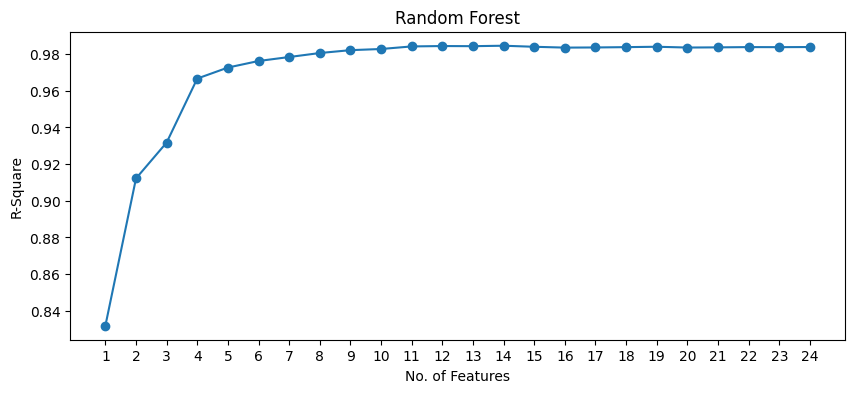

In [17]:
from matplotlib import pyplot as plt1

plt1.figure(figsize=(10, 4))  # width=10, height=6
plt1.plot(list(result.keys()), [value['r_sq'] for value in result.values()], marker='o', linestyle='-')
plt1.title('Random Forest')
plt1.xlabel('No. of Features')
plt1.ylabel('R-Square')
plt1.show()

# Model 2

## Correlation

In [91]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df = pd.read_excel(file_path)

df = df.fillna(0)
df=df.drop(['Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks',
            'MobileWeb_TWC Mobile Web_Visits', 'Web_TWC Web_Visits',
            'Apps_TWC Universal iOS 4G+_Visits','Apps_TWC Universal Android 4G+_Visits',
           #'Installs_Critical_Event_Flag',
            'Overall_Product_Visits',
            #'Total_App_Installs',
            'Overall_Visits_Critical_Event_Flag','Critical_Event_Flag',
           'Visits_Critical_Event_Flag', 'Overall_Web_Visits'], axis =1)
# Compute the correlation matrix
correlation_matrix = df.corr()


C:\Users\DeepakArun\AppData\Local\Temp\ipykernel_22340\2079716426.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [92]:
correlation_matrix.to_clipboard()

## VIF

In [93]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df_, var):
    df_ = df_[var]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_.columns
    vif_data["VIF"] = [variance_inflation_factor(df_.values, i) for i in range(len(df_.columns))]
    return vif_data

# Load your DataFrame (update the file path)
file_path = 'C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx'  # Update with the actual path to your file
df_ = pd.read_excel(file_path)
df_=df_.fillna(0)

# Define the features
date_var = ['Date']
temp_var = ['PaidSocial_Twitter_Spend', 'PaidSocial_Twitter_Clicks', 'PaidSocial_Twitter_Impressions',
            'Programmatic_TikTok_Spend', 'Programmatic_TikTok_Clicks', 'Programmatic_TikTok_Impressions',
            'Overall_Product_Visits', 
            #'EventsCamp/Vend_Campaign_Flag', 
            'Visits_Critical_Event_Flag',
            'Overall_Visits_Critical_Event_Flag', #'Installs_Critical_Event_Flag', 
            'MobileWeb_TWC Mobile Web_Visits', 'Critical_Event_Flag',
            'Apps_TWC Universal Android 4G+_Visits', 'Apps_TWC Universal iOS 4G+_Visits','Web_TWC Web_Visits',
            'Overall_Web_Visits','Total_App_Installs','Overall_Product_Visits',
            'EventsCamp/Vend_Campaign/Vendor(s)', 'Event_Name','Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks','PaidSocial_Vibe_Spend',
'PaidSocial_Vibe_Impressions']

cols = list(df_.columns)
remove_var = date_var + temp_var
cols = [item for item in cols if item not in remove_var]

# Calculate VIF
df_ads_vif = get_vif(df_, cols)
print(df_ads_vif)


                            Variable           VIF
0                   SEM_Google_Spend  1.150897e+01
1                  SEM_Google_Clicks  1.383250e+01
2             SEM_Google_Impressions  2.104353e+00
3      Preload_IronSource_Aura_Spend  2.886751e+01
4   Preload_IronSource_Aura_launches  2.494985e+01
..                               ...           ...
62                               NPS  2.428978e+02
63      Positive impact on community  3.157220e+05
64     Positive impact on well being  1.277073e+06
65                       Brand_Spend  5.527424e+00
66                 Brand_Impressions  8.519880e+00

[67 rows x 2 columns]


In [94]:
df_ads_vif.to_clipboard()


## High Corr Pairs

In [68]:
# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df = pd.read_excel(file_path)

df = df.fillna(0)
df_corr = []

df = df.drop(['Date','PaidSocial_Twitter_Spend', 'PaidSocial_Twitter_Clicks', 'PaidSocial_Twitter_Impressions',
            'Programmatic_TikTok_Spend', 'Programmatic_TikTok_Clicks', 'Programmatic_TikTok_Impressions',
            'Overall_Product_Visits', 
              #'EventsCamp/Vend_Campaign_Flag', 
              'Critical_Event_Flag',
            'Overall_Visits_Critical_Event_Flag','Visits_Critical_Event_Flag', 
              #'Installs_Critical_Event_Flag', 
              'MobileWeb_TWC Mobile Web_Visits',
            'Apps_TWC Universal Android 4G+_Visits', 'Apps_TWC Universal iOS 4G+_Visits','Web_TWC Web_Visits',
            #'Overall_Web_Visits',
              'Total_App_Installs','Overall_Product_Visits',
            'EventsCamp/Vend_Campaign/Vendor(s)', 'Event_Name','Preload_Digital_Turbine_impressions', 
            'Programmatic_Tapjoy_Impressions', 'PaidSocial_Vibe_Clicks'], axis =1)


#df_corr = pd.DataFrame()
for var1 in list(df.columns):
    for var2 in list(df.columns):
        corr = df[var1].corr(df[var2])
        #if (abs(corr) >= 0.75 and abs(corr) < 1) and (var1 != var2):
         #   print (corr)
        df_corr.append({"variable 1": var1, "variable 2": var2, "Correlation": corr})
df_corr1 = pd.DataFrame(df_corr)           

In [69]:
df_corr1

,variable 1,variable 2,Correlation
0,SEM_Google_Spend,SEM_Google_Spend,1.000000
1,SEM_Google_Spend,SEM_Google_Clicks,0.854827
2,SEM_Google_Spend,SEM_Google_Impressions,0.508332
3,SEM_Google_Spend,Preload_IronSource_Aura_Spend,0.384936
4,SEM_Google_Spend,Preload_IronSource_Aura_launches,0.326721
...,...,...,...
4619,Brand_Impressions,NPS,-0.200337
4620,Brand_Impressions,Positive impact on community,0.190424
4621,Brand_Impressions,Positive impact on well being,0.191380
4622,Brand_Impressions,Brand_Spend,-0.079348


In [53]:
df_corr1.columns

Index(['variable 1', 'variable 2', 'Correlation'], dtype='object')

In [70]:
# Create a set to keep track of unique pairs
unique_pairs = set()
rows_to_keep = []

for index, row in df_corr1.iterrows():
    pair = tuple(sorted([row['variable 1'], row['variable 2']]))
    if pair not in unique_pairs:
        unique_pairs.add(pair)
        rows_to_keep.append(index)

# Filter the DataFrame to keep only unique pairs
unique_df = df_corr1.loc[rows_to_keep]

# Print the refined DataFrame
unique_df

,variable 1,variable 2,Correlation
0,SEM_Google_Spend,SEM_Google_Spend,1.000000
1,SEM_Google_Spend,SEM_Google_Clicks,0.854827
2,SEM_Google_Spend,SEM_Google_Impressions,0.508332
3,SEM_Google_Spend,Preload_IronSource_Aura_Spend,0.384936
4,SEM_Google_Spend,Preload_IronSource_Aura_launches,0.326721
...,...,...,...
4486,Positive impact on well being,Brand_Spend,-0.569314
4487,Positive impact on well being,Brand_Impressions,0.191380
4554,Brand_Spend,Brand_Spend,1.000000
4555,Brand_Spend,Brand_Impressions,-0.079348


In [71]:
unique_df.to_clipboard()

## RFE

In [28]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest ADS data (Preprocessing).xlsx"
df1 = pd.read_excel(file_path)
df1=df1.fillna(0)


In [96]:
df3=df1.drop(['SocialEng_LinkedIn_Estimated_Clicks',
'SocialEng_Instagram_Estimated_Clicks',
'SocialEng_YouTube_Estimated_Clicks',
'Preload_Digital_Turbine_impressions',
'SocialEng_LinkedIn_Impressions',
'SocialEng_TikTok_Impressions',
'SocialEng_Twitter_Estimated_Clicks',
'SocialEng_Facebook_Impressions',
'SocialEng_Facebook_Total_Engagements',
'SocialEng_Instagram_Total_Engagements',
'Preload_Digital_Turbine_app_downloads',
'SocialEng_YouTube_Total_Engagements',
'SocialEng_Twitter_Impressions',
'Programmatic_LiftOff_Clicks',
'SEM_Apple_Search_Ads_Clicks',
'Programmatic_Persona.ly_Impressions',
'Programmatic_Bidease_Impressions',
'Programmatic_Bidease_Clicks',
'SEM_Google_Clicks',
'OrganicSearch_Google_Impressions',
'Preload_IronSource_Aura_launches',
'Programmatic_IronSource_Sonic_Clicks',
'Preload_IronSource_Aura_app_downloads',
'Twitter_TikTok_Combined_Clicks',
'Net Favorability',
'Positive impact on community',
'Usage',
'Accuracy',
'Realibality',
'Seen as experts',
'Positive impact on well being',
'PaidSocial_Twitter_Spend',
'Programmatic_Tapjoy_Impressions',
'PaidSocial_Twitter_Clicks',
'PaidSocial_Twitter_Impressions',
'Programmatic_TikTok_Spend',
'Programmatic_TikTok_Clicks',
'Programmatic_TikTok_Impressions',
'PaidSocial_Vibe_Spend',
'PaidSocial_Vibe_Impressions',
'PaidSocial_Vibe_Clicks',
'MobileWeb_TWC Mobile Web_Visits',
'Apps_TWC Universal Android 4G+_Visits',
'Apps_TWC Universal iOS 4G+_Visits', 
'Web_TWC Web_Visits',
#'SocialEng_YouTube_Total_Engagements',
'Overall_Product_Visits',
'Programmatic_Tapjoy_Spend',
'Influencer_Spend',
'Brand_Spend',
'Programmatic_IronSource_Sonic_Spend',
'SEM_Apple_Search_Ads_Spend',
'Programmatic_Bidease_Spend',
'Programmatic_Persona.ly_Spend',
'Preload_Digital_Turbine_Spend',
'Twitter_TikTok_Combined_Spend',
'SEM_Google_Spend',
'Programmatic_LiftOff_Spend',
'Preload_IronSource_Aura_Spend',
#'Installs_Critical_Event_Flag',
'Visits_Critical_Event_Flag',
              'Overall_Visits_Critical_Event_Flag',
              'Critical_Event_Flag',
              'Event_Name',
              'EventsCamp/Vend_Campaign/Vendor(s)',
             'Positive impact on community',#'Programmatic_Bidease_Clicks',
              'Overall_Web_Visits'#,#'Net Trust'
], axis=1)

In [29]:
df3=df1.drop(['SEM_Google_Clicks',
'Preload_IronSource_Aura_launches',
'Preload_IronSource_Aura_app_downloads',
'Programmatic_Bidease_Impressions',
'Preload_Digital_Turbine_app_downloads',
'Preload_Digital_Turbine_impressions',
'SEM_Apple_Search_Ads_Clicks',
'Programmatic_LiftOff_Clicks',
'Programmatic_IronSource_Sonic_Clicks',
'PaidSocial_Twitter_Spend',
'Programmatic_Tapjoy_Impressions',
'PaidSocial_Twitter_Clicks',
'PaidSocial_Twitter_Impressions',
'Programmatic_TikTok_Spend',
'Programmatic_TikTok_Clicks',
'Programmatic_TikTok_Impressions',
'PaidSocial_Vibe_Spend',
'PaidSocial_Vibe_Impressions',
'Programmatic_Persona.ly_Impressions',
'SocialEng_Facebook_Impressions',
'SocialEng_Facebook_Total_Engagements',
'SocialEng_LinkedIn_Total_Engagements',
'SocialEng_LinkedIn_Estimated_Clicks',
'SocialEng_YouTube_Total_Engagements',
'SocialEng_YouTube_Impressions',
'SocialEng_Instagram_Total_Engagements',
'SocialEng_Instagram_Impressions',
'SocialEng_Twitter_Impressions',
'SocialEng_Twitter_Estimated_Clicks',
'SocialEng_TikTok_Total_Engagements',
'OrganicSearch_Google_Impressions',
'Twitter_TikTok_Combined_Clicks',
'Usage',
'Seen as experts',
'Net Favorability',
'Realibality',
'Accuracy',
'Positive impact on well being',
'PaidSocial_Vibe_Clicks',
'Overall_Web_Visits',
'MobileWeb_TWC Mobile Web_Visits',
'Apps_TWC Universal Android 4G+_Visits',
'Apps_TWC Universal iOS 4G+_Visits', 
'Web_TWC Web_Visits',
#'SocialEng_YouTube_Total_Engagements',
'Overall_Product_Visits',
'Programmatic_Tapjoy_Spend',
'Influencer_Spend',
'Brand_Spend',
'Programmatic_IronSource_Sonic_Spend',
'SEM_Apple_Search_Ads_Spend',
'Programmatic_Bidease_Spend',
'Programmatic_Persona.ly_Spend',
'Preload_Digital_Turbine_Spend',
'Twitter_TikTok_Combined_Spend',
'SEM_Google_Spend',
'Programmatic_LiftOff_Spend',
'Preload_IronSource_Aura_Spend',
#'Installs_Critical_Event_Flag',
'Visits_Critical_Event_Flag',
              'Overall_Visits_Critical_Event_Flag',
              'Critical_Event_Flag',
              'Event_Name',
              'EventsCamp/Vend_Campaign/Vendor(s)',
             'Positive impact on community',#'Programmatic_Bidease_Clicks',
              'Net Trust',
              'OrganicSearch_Google_Position'
], axis=1)

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import datetime

def get_feature_importance(df, target_var): 
    """Getting feature importance of the variables in the dataset, for users to make decision while choosing the contextual variables
        Args:
            df: A Pandas DataFrame
            target_var: Target variable for prediction
        Returns: DataFrame containing feature importance
    """   
    var_list = []
    for col in df.columns:
        if (col == target_var) or isinstance(df[col], datetime.date) or pd.api.types.is_datetime64_dtype(df[col]):
            continue
        if (df[col].dtypes == object) or (df[col].dtypes == str):
            continue
        var_list.append(col)

    # Ensure 'EventsCamp/Vend_Campaign_Flag' and 'Critical_Event_Flag' are included
    important_columns = ['EventsCamp/Vend_Campaign_Flag', 'Critical_Event_Flag']
    for col in important_columns:
        if col in df.columns and col not in var_list:
            var_list.append(col)
    
    print("Variables considered for feature importance:", var_list)
    
    X = df[var_list]
    y = df[target_var]
    
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)
    
    feat_importances = round(pd.Series(rf.feature_importances_, index=X.columns)*100, 2)
    feat_importances = feat_importances.sort_values(ascending=False)
    feat_importances_df = pd.DataFrame(feat_importances).reset_index(drop=False)
    feat_importances_df = feat_importances_df.rename({'index':'Variable', 0:'Importance'}, axis=1)

    return feat_importances_df

# Example usage:
# df = pd.read_csv('your_data.csv')
# target_var = 'your_target_variable'
# importance_df = get_feature_importance(df, target_var)
# print(importance_df)


In [31]:
# w/o removing variables post correlation analysis
#target_var = 'Web_MobileWeb_Combined_Visits'
target_var ='Total_App_Installs'
feature_importance = get_feature_importance(df3, target_var)
feature_importance

Variables considered for feature importance: ['SEM_Google_Impressions', 'Preload_IronSource_Aura_impressions', 'Programmatic_Bidease_Clicks', 'Preload_Digital_Turbine_launches', 'Programmatic_Tapjoy_Clicks', 'SEM_Apple_Search_Ads_Impressions', 'Programmatic_LiftOff_Impressions', 'Programmatic_IronSource_Sonic_Impressions', 'Programmatic_Persona.ly_Clicks', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_TikTok_Impressions', 'OrganicSearch_Google_Clicks', 'US Weather Impact Rating', 'EventsCamp/Vend_Campaign_Flag', 'Installs_Critical_Event_Flag', 'Twitter_TikTok_Combined_Impressions', 'Influencer_Daily_Impressions', 'Preference', 'NPS', 'Brand_Impressions']


,Variable,Importance
0,OrganicSearch_Google_Clicks,42.58
1,US Weather Impact Rating,7.54
2,SocialEng_Twitter_Total_Engagements,6.45
3,SEM_Google_Impressions,6.27
4,Influencer_Daily_Impressions,5.89
5,SEM_Apple_Search_Ads_Impressions,4.57
6,NPS,3.35
7,SocialEng_Facebook_Estimated_Clicks,3.04
8,SocialEng_TikTok_Impressions,2.60
9,Programmatic_Persona.ly_Clicks,2.36


In [32]:
feature_importance.to_clipboard()

In [33]:
from sklearn.metrics import r2_score
def get_random_forest_r2_curve(df, importance_df, split_flag):
    X_var = []
    y = df['Total_App_Installs']
    result = {}
    counter = 1
    for var in list(importance_df['Variable']):
        X_var = X_var + [var]
        X = df[X_var]
        tree_regressor = RandomForestRegressor(random_state=42)
#         tree_regressor.fit(X, y)
#         y_pred = tree_regressor.predict(X)
#         r_squared = r2_score(y, y_pred)
#         n = X.shape[0]
#         p = X.shape[1]
        if split_flag == 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        else:
            X_train, X_test = X, X
            y_train, y_test = y, y
            
        tree_regressor.fit(X_train, y_train)
        y_pred = tree_regressor.predict(X_test)
        
        r_squared = r2_score(y_test, y_pred)
        n = X_test.shape[0]
        p = X_test.shape[1]
        adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
        result[str(counter)] = {'var': X_var,
                           'r_sq': r_squared,
                           'adj_r_sq': adjusted_r_squared}
        counter = counter + 1
    return result

train_test_split_flag = 0
result = get_random_forest_r2_curve(df3, feature_importance, train_test_split_flag)
result

{'1': {'var': ['OrganicSearch_Google_Clicks'],
  'r_sq': 0.8764473690953244,
  'adj_r_sq': 0.8763240630764575},
 '2': {'var': ['OrganicSearch_Google_Clicks', 'US Weather Impact Rating'],
  'r_sq': 0.9080674985444963,
  'adj_r_sq': 0.9078838172229069},
 '3': {'var': ['OrganicSearch_Google_Clicks',
   'US Weather Impact Rating',
   'SocialEng_Twitter_Total_Engagements'],
  'r_sq': 0.9294354235188897,
  'adj_r_sq': 0.9292237297894465},
 '4': {'var': ['OrganicSearch_Google_Clicks',
   'US Weather Impact Rating',
   'SocialEng_Twitter_Total_Engagements',
   'SEM_Google_Impressions'],
  'r_sq': 0.9390290634694324,
  'adj_r_sq': 0.9387849355954361},
 '5': {'var': ['OrganicSearch_Google_Clicks',
   'US Weather Impact Rating',
   'SocialEng_Twitter_Total_Engagements',
   'SEM_Google_Impressions',
   'Influencer_Daily_Impressions'],
  'r_sq': 0.95256525464046,
  'adj_r_sq': 0.9523276056156127},
 '6': {'var': ['OrganicSearch_Google_Clicks',
   'US Weather Impact Rating',
   'SocialEng_Twitter_Tot

In [34]:
# Transform dictionary to DataFrame
imp = pd.DataFrame.from_dict(result, orient='index')
imp.index.name = 'Model'

In [35]:
imp.to_clipboard()

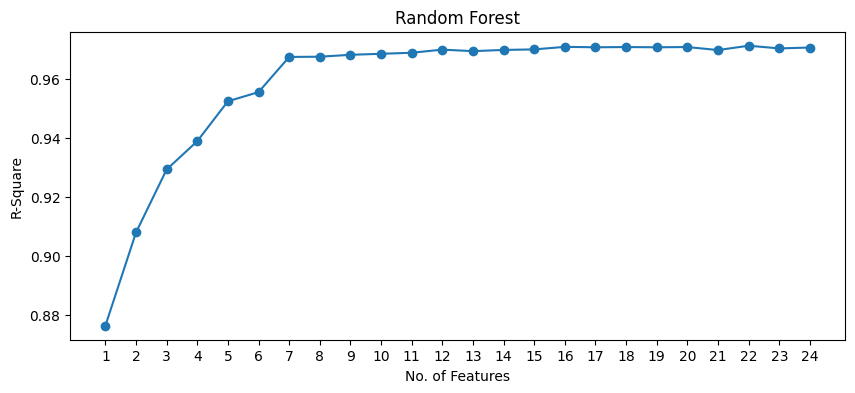

In [36]:
from matplotlib import pyplot as plt1

plt1.figure(figsize=(10, 4))  # width=10, height=6
plt1.plot(list(result.keys()), [value['r_sq'] for value in result.values()], marker='o', linestyle='-')
plt1.title('Random Forest')
plt1.xlabel('No. of Features')
plt1.ylabel('R-Square')
plt1.show()

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Social Media Latest.xlsx"
df1 = pd.read_excel(file_path)
df1=df1.fillna(0)

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Organic google.xlsx"
df2 = pd.read_excel(file_path)
df2=df2.fillna(0)

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\User Acquisition data.xlsx"
df3 = pd.read_excel(file_path)
df3=df3.fillna(0)

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Brand spend and impressions latest.xlsx"
df4 = pd.read_excel(file_path)
df4=df4.fillna(0)

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Latest visits an weather data.xlsx"
df5 = pd.read_excel(file_path)
df5=df5.fillna(0)

# Load the dataset
file_path = "C:\\Users\\DeepakArun\\Desktop\\Influencer data.xlsx"
df6 = pd.read_excel(file_path)
df6=df6.fillna(0)

In [7]:
df5.head()

,Region,Platform,Brand,Product,Date,Metric,Value,Goal,% of Goal,US Weather Impact Rating
0,US,APPS,TWC,TWC Universal Android 4G+,2021-01-01,Visits,10826157.0,9.480909e+06,1.141890,2.0
1,US,APPS,TWC,TWC Universal iOS 4G+,2021-01-01,Visits,29938503.0,2.445336e+07,1.224310,2.0
2,US,MOBILE WEB,TWC,TWC Mobile Web,2021-01-01,Visits,12464048.0,9.811220e+06,1.270387,2.0
3,US,WEB,TWC,TWC Web,2021-01-01,Visits,3027135.0,3.530082e+06,0.857525,2.0
4,US,APPS,TWC,TWC Universal Android 4G+,2021-01-02,Visits,8603391.0,9.669803e+06,0.889717,1.5


In [6]:
# Ensure the 'Date' columns are the same type and sorted
dfs = [df1, df2, df3, df4, df5, df6]
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)

# Create a complete date range
start_date = '2021-09-01'
end_date = '2024-05-31'
date_range = pd.date_range(start=start_date, end=end_date)

# Remove duplicates based on 'Date' column
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop_duplicates(subset='Date').set_index('Date').reindex(date_range, fill_value=0).rename_axis('Date').reset_index()

# Merge all DataFrames on the 'Date' column
result = dfs[0]
for df in dfs[1:]:
    result = result.merge(df, on='Date', how='outer', suffixes=('', '_y'))

# If there are any overlapping columns due to the suffixes, remove the duplicate columns
for col in result.columns:
    if '_y' in col:
        result[col.replace('_y', '')] += result[col]
        result.drop(columns=col, inplace=True)

result

,Date,SocialEng_Facebook_Impressions,SocialEng_Facebook_Total_Engagements,SocialEng_Facebook_Estimated_Clicks,SocialEng_LinkedIn_Impressions,SocialEng_LinkedIn_Total_Engagements,SocialEng_LinkedIn_Estimated_Clicks,SocialEng_YouTube_Impressions,SocialEng_YouTube_Estimated_Clicks,SocialEng_Instagram_Impressions,...,Brand,Product,Metric,Value,Goal,% of Goal,US Weather Impact Rating,Spend,Daily Imp,Daily ER
0,2021-09-01,4805113,31079,20632,107826.0,1804.0,1258.0,0,0,345169,...,TWC,TWC Universal Android 4G+,Visits,12075838.0,1.149449e+07,1.050576,2.00,0.0,0.0,0.0
1,2021-09-02,4013773,29663,87579,88570.0,1525.0,1681.0,0,0,532110,...,TWC,TWC Universal Android 4G+,Visits,8812651.0,1.150994e+07,0.765656,1.75,0.0,0.0,0.0
2,2021-09-03,2120546,6469,12172,64859.0,1317.0,258.0,0,0,265977,...,TWC,TWC Universal Android 4G+,Visits,7784024.0,1.094245e+07,0.711360,1.50,0.0,0.0,0.0
3,2021-09-04,1239395,4812,18746,229.0,31.0,33.0,0,0,113167,...,TWC,TWC Universal Android 4G+,Visits,8019276.0,1.116046e+07,0.718543,1.50,0.0,0.0,0.0
4,2021-09-05,184223,304,107,189.0,8.0,9.0,0,0,0,...,TWC,TWC Universal Android 4G+,Visits,8075385.0,1.115249e+07,0.724088,1.25,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2024-05-27,1449201,12973,0,0.0,0.0,0.0,0,0,273707,...,TWC,TWC Universal Android 4G+,Visits,14010423.0,0.000000e+00,0.000000,1.75,0.0,0.0,0.0
1000,2024-05-28,598819,7072,0,1352.0,44.0,0.0,0,0,575176,...,TWC,TWC Universal Android 4G+,Visits,11717852.0,0.000000e+00,0.000000,1.50,0.0,0.0,0.0
1001,2024-05-29,1187431,10665,0,1994.0,63.0,0.0,0,0,551652,...,TWC,TWC Universal Android 4G+,Visits,9604643.0,0.000000e+00,0.000000,1.50,0.0,0.0,0.0
1002,2024-05-30,1141994,13621,0,1329.0,38.0,0.0,0,0,656495,...,TWC,TWC Universal Android 4G+,Visits,9024250.0,0.000000e+00,0.000000,1.50,0.0,0.0,0.0
